In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
u=r"D:\projects\HR-Employee-Attrition-All.csv"
df=pd.read_csv(u)

In [7]:
# print(df.head())
print(df.isnull().sum())
print(df.info())
print(df.describe())
# print(df.tail())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# drop unvanted col
drop_cols = [
    "EmployeeCount",   # always 1
    "StandardHours",   # always 80
    "Over18",          # always 'Y'
    "EmployeeNumber"   # unique ID, no learning value
]

df.drop(columns=drop_cols, inplace=True)

In [9]:
# using median
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [10]:
# using mode for categorical val
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [11]:
# convert target values categorical to num 
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [12]:
# using labelencoder for convert categorical val to num
le = LabelEncoder()
for col in cat_cols:
    if col != "Attrition":
        df[col] = le.fit_transform(df[col])

In [13]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [14]:
# using cound fun to see targect data
print(df["Attrition"].value_counts())
# df.head()

Attrition
0    1233
1     237
Name: count, dtype: int64


In [36]:
corr_with_target = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)

In [16]:
top_corr = corr_with_target.head(20).index[1:]
print(top_corr)

Index(['OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole',
       'Department', 'NumCompaniesWorked', 'Gender', 'EducationField',
       'MonthlyRate', 'PerformanceRating', 'BusinessTravel', 'HourlyRate',
       'PercentSalaryHike', 'Education', 'YearsSinceLastPromotion',
       'RelationshipSatisfaction', 'DailyRate', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


In [17]:
x=df[top_corr]
y=df['Attrition']

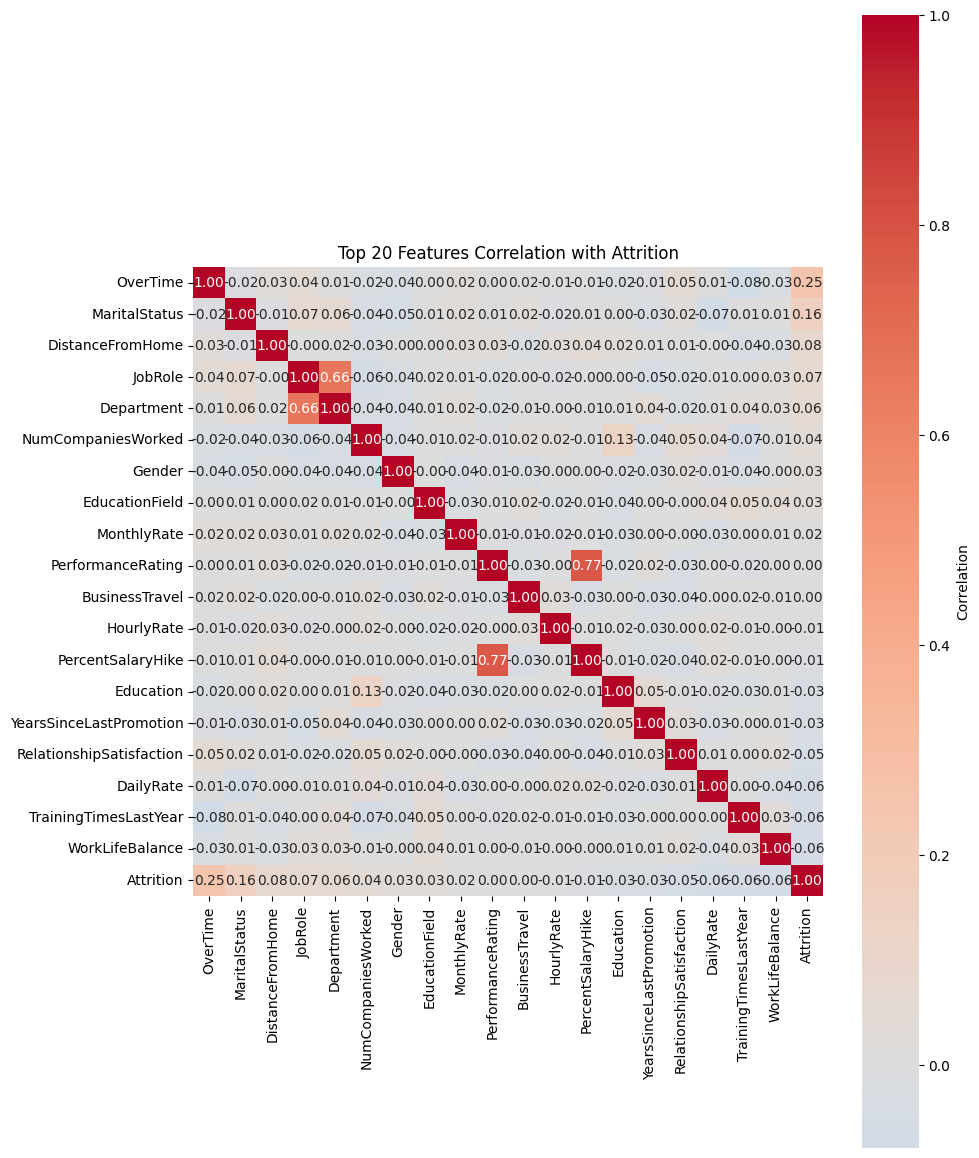

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(8,10))
# vis_fea_data=top_corr.head(19)[1:].index[:18]
# print(f"top 20 featurs using heatmap to vissvalised{list(vis_fea_data)}")
# corr_matrix=df[list(vis_fea_data)+['Attrition']].corr()
# sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0,
#             square=True,fmt='.2f',cbar_kws={'label':'correlation'})
# plt.title('features data displaed using heatmap')
# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,12))

heatmap_data = df[list(top_corr) + ['Attrition']]
corr_matrix = heatmap_data.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    cbar_kws={'label': 'Correlation'}
)

plt.title('Top 20 Features Correlation with Attrition')
plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [21]:
model=RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8775510204081632


In [24]:
import joblib 
joblib.dump(model,"ans.pkl")

['ans.pkl']

In [26]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)

c:\Users\Karthikeyan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
log_acc=accuracy_score(y_test,y_pred_log)
log_acc

0.8707482993197279

In [28]:
model_NB=GaussianNB()
model_NB.fit(x_train,y_train)
y_pred_NB=model_NB.predict(x_test)
NB_acc=accuracy_score(y_test,y_pred_NB)
NB_acc

0.8707482993197279

In [29]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
dt_acc=accuracy_score(y_test,y_pred_dt)
dt_acc

0.7551020408163265

In [35]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(x_train,y_train)
y_pred_KNN=model_KNN.predict(x_test)
KNN_acc=accuracy_score(y_test,y_pred_KNN)
KNN_acc

0.8231292517006803